In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

In [4]:
# load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target   # Add target column

# Show first 5 rows
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [5]:
# Check missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mea

**We'll predict house price (Price) using median income (MedInc).**

In [6]:
df = df[['MedInc', 'Price']]

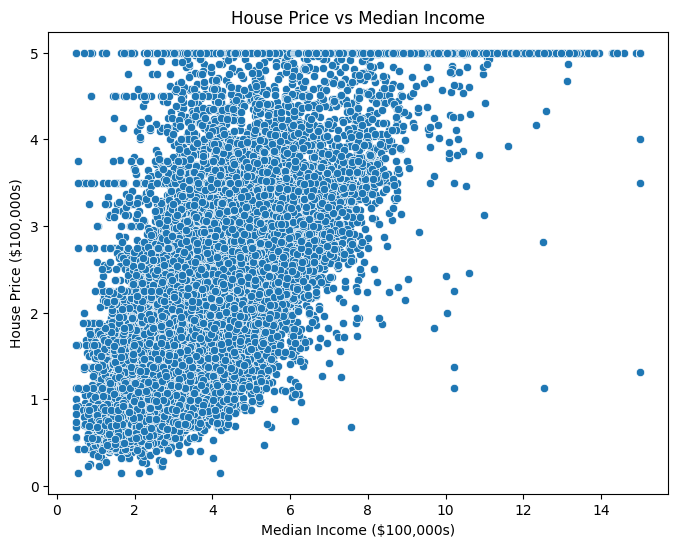

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['MedInc'], y=df['Price'])
plt.xlabel('Median Income ($100,000s)')
plt.ylabel('House Price ($100,000s)')
plt.title('House Price vs Median Income')
plt.show()

In [10]:
# Define input (X) and output (y)
X = df[['MedInc']]
y = df[['Price']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(f'Training Data: {X_train.shape}, Testing Data: {X_test.shape}')

Training Data: (16512, 1), Testing Data: (4128, 1)


In [12]:
# Create Decision Tree model
model = DecisionTreeRegressor(max_depth=4)

# Train the model
model.fit(X_train, y_train)

# Print tree depth
print(f'Tree Depth: {model.get_depth()}')

Tree Depth: 4


In [15]:
# Predict on test data
y_pred = model.predict(X_test)

# Show first 5 predictions vs actual values
predictions = pd.DataFrame({'Actual': y_test.values.ravel(), 'Predicted': y_pred.ravel()})
print(predictions.head())

    Actual  Predicted
0  0.47700   1.098879
1  0.45800   1.407830
2  5.00001   1.836452
3  2.18600   2.881691
4  2.78000   2.025015


.ravel() flattens a 2D array into 1D.

y_test.values is a 2D array, but Pandas expects a 1D array for creating a DataFrame.


In [16]:
# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 0.6963


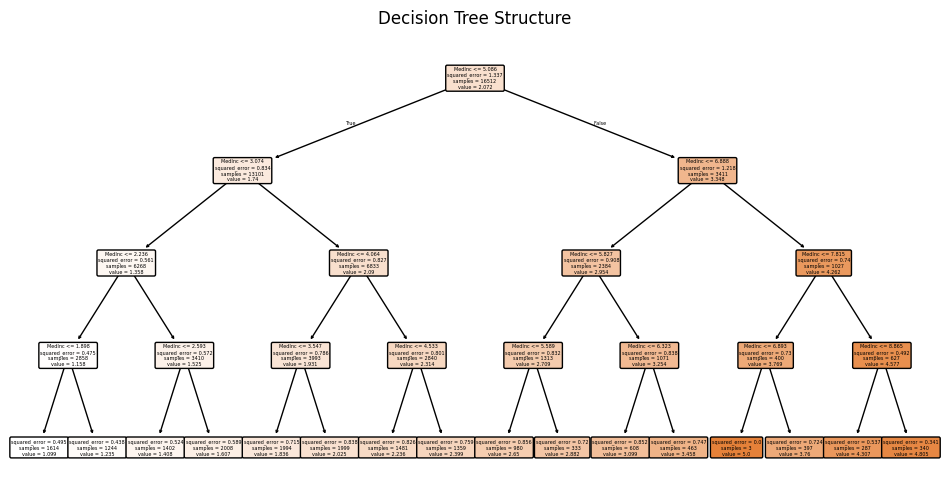

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=['MedInc'], filled=True, rounded=True)
plt.title('Decision Tree Structure')
plt.show()

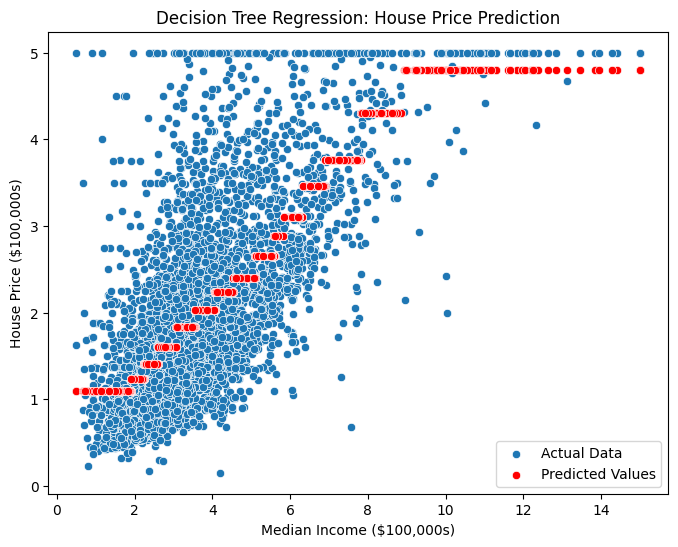

In [19]:
plt.figure(figsize=(8, 6))


# Flatten X_test and y_test for plotting
X_test_flat = X_test.values.flatten()  # Convert to 1D
y_test_flat = y_test.values.flatten()  # Convert to 1D


# Scatter plot (actual data)
sns.scatterplot(x=X_test_flat, y=y_test_flat, label='Actual Data')

# Scatter plot (predicted values)
sns.scatterplot(x=X_test_flat, y=y_pred, color='red', label='Predicted Values')

plt.xlabel('Median Income ($100,000s)')
plt.ylabel('House Price ($100,000s)')
plt.legend()
plt.title('Decision Tree Regression: House Price Prediction')
plt.show()